In [6]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter, OrderedDict


area_data = np.load('/work/a06/tsuda/m1//12grid_area_result.npy')
years = [900, 1400, 1700, 1850, 1950, 2000]
class_labels={}
for year in years:


    climate_data = np.load(f'/work/a06/tsuda/m1/CSIRO/climate_class_{year}.npy', allow_pickle=True)

    pop_count_data = np.genfromtxt(f"popc_{year}AD.asc", skip_header=6, delimiter='')

    pop_density_data = np.genfromtxt(f"popd_{year}AD.asc", skip_header=6, delimiter='')

    total_population_per_class = np.sum(pop_count_data[pop_count_data >= 0])

    flat_population_density =pop_density_data.flatten()
    valid_indices = np.where(flat_population_density >= 0)
    sorted_indices = np.argsort(flat_population_density[valid_indices])

    sorted_population_density = flat_population_density[valid_indices][sorted_indices]
    sorted_grid_locations = np.column_stack(np.unravel_index(valid_indices[0][sorted_indices], pop_density_data.shape))

    class_labels = [0]
    current_total_population = 0
    total_population = [int(total_population_per_class * 10 / 100),
                        int(total_population_per_class * 80 / 300),
                        int(total_population_per_class * 80 / 300),
                        int(total_population_per_class * 80 / 300),
                        int(total_population_per_class * 10 / 100)]

    for i in range(4):
        if i == 0:
            target_population = total_population_per_class * 10 / 100
        if i == 1:
            target_population = total_population_per_class * 110 / 300
        if i == 2:
            target_population = total_population_per_class * 190 / 300
        if i == 3:
            target_population = total_population_per_class * 270 / 300
        for index in sorted_grid_locations:
            p, k = index
            current_total_population += pop_count_data[p, k]
            if current_total_population >= target_population:
                class_labels.append(pop_density_data[p, k])
                print(f"Added class label: {pop_density_data[p, k]}")
                break
        current_total_population = 0

    class_labels.append(np.max(pop_density_data))
    class_labels = np.array(class_labels)
    # class_labels辞書をループして、各年のクラスラベルをファイルに保存
for year, labels in class_labels.items():
    # ファイル名を指定。例: 'class_labels_2000.npy'
    filename = f'class_labels_{year}.npy'
    # np.save関数を使用してファイルに保存
    np.save(filename, labels)


Added class label: 2.01381324471
Added class label: 12.1646267756
Added class label: 31.2686849419
Added class label: 105.217446218
Added class label: 2.69868387102
Added class label: 16.2257331007
Added class label: 38.2631886059
Added class label: 114.095860227
Added class label: 4.25663755655
Added class label: 27.1925354226
Added class label: 58.5037466676
Added class label: 165.514176707
Added class label: 10.5905255758
Added class label: 62.5487456979
Added class label: 159.32991607
Added class label: 391.698209441
Added class label: 21.4210980597
Added class label: 122.271833056
Added class label: 349.409237616
Added class label: 1565.50583689
Added class label: 55.7977825684
Added class label: 351.413658912
Added class label: 1048.0251299
Added class label: 6296.06693171


AttributeError: 'numpy.ndarray' object has no attribute 'items'

In [8]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter, OrderedDict

area_data = np.load('/work/a06/tsuda/m1//12grid_area_result.npy')
years = [900, 1400, 1700, 1850, 1950, 2000]
class_labels = {}  # 辞書型で初期化

for year in years:
	climate_data = np.load(f'/work/a06/tsuda/m1/CSIRO/climate_class_{year}.npy', allow_pickle=True)
	pop_count_data = np.genfromtxt(f"popc_{year}AD.asc", skip_header=6, delimiter='')
	pop_density_data = np.genfromtxt(f"popd_{year}AD.asc", skip_header=6, delimiter='')
	total_population_per_class = np.sum(pop_count_data[pop_count_data >= 0])
	flat_population_density = pop_density_data.flatten()
	valid_indices = np.where(flat_population_density >= 0)
	sorted_indices = np.argsort(flat_population_density[valid_indices])
	sorted_population_density = flat_population_density[valid_indices][sorted_indices]
	sorted_grid_locations = np.column_stack(np.unravel_index(valid_indices[0][sorted_indices], pop_density_data.shape))
	temp_class_labels = [0]  # 一時リスト
	current_total_population = 0
	total_population = [int(total_population_per_class * 10 / 100),
						int(total_population_per_class * 80 / 300),
						int(total_population_per_class * 80 / 300),
						int(total_population_per_class * 80 / 300),
						int(total_population_per_class * 10 / 100)]
	for i in range(4):
		if i == 0:
			target_population = total_population_per_class * 10 / 100
		if i == 1:
			target_population = total_population_per_class * 110 / 300
		if i == 2:
			target_population = total_population_per_class * 190 / 300
		if i == 3:
			target_population = total_population_per_class * 270 / 300
		for index in sorted_grid_locations:
			p, k = index
			current_total_population += pop_count_data[p, k]
			if current_total_population >= target_population:
				temp_class_labels.append(pop_density_data[p, k])
				break
		current_total_population = 0
	temp_class_labels.append(np.max(pop_density_data))
	class_labels[year] = np.array(temp_class_labels)  # 辞書に追加

# class_labels辞書をループして、各年のクラスラベルをファイルに保存
for year, labels in class_labels.items():
	filename = f'class_labels_{year}.npy'  # ファイル名を指定
	np.save(filename, labels)  # ファイルに保存

In [15]:
class_labels=   np.load('class_labels_1850.npy')
print(class_labels)

[0.00000000e+00 1.05905256e+01 6.25487457e+01 1.59329916e+02
 3.91698209e+02 1.86462107e+04]


/tmp/ipykernel_2343950/2787919155.py:12: RuntimeWarning: invalid value encountered in divide
  land_area[pop_density_data>=0]=pop_count_data[pop_density_data>=0]/pop_density_data[pop_density_data>=0]
/tmp/ipykernel_2343950/2787919155.py:17: RuntimeWarning: invalid value encountered in cast
  grid_counts = np.round(area_ratio).astype(int)


[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


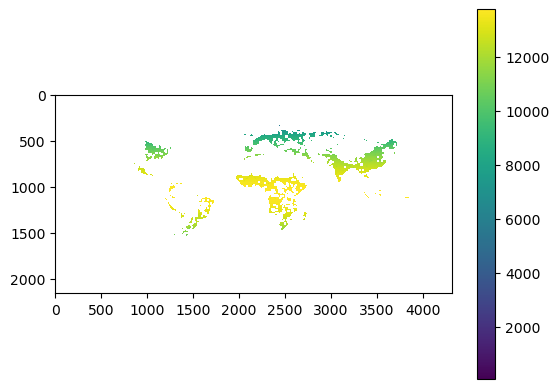

In [18]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter, OrderedDict


area_data = np.load('/work/a06/tsuda/m1//12grid_area_result.npy')

#陸地面積による重みづけを導入したい。人口/人口密度で陸地面積を計算
land_area = np.zeros((2160, 4320))
#陸地ではないところにはnanを入れる
land_area[pop_density_data>=0]=pop_count_data[pop_density_data>=0]/pop_density_data[pop_density_data>=0]
land_area[pop_density_data<0]=np.nan

#nunを除いて、対象陸地面積が一番小さなグリッド面積の何倍かを計算
area_ratio = land_area / area_data.min() * 10
grid_counts = np.round(area_ratio).astype(int)

print(area_ratio)
#area_ratioを描画
plt.imshow(area_ratio)
plt.xlim()
plt.colorbar()
plt.show()



In [ ]:


years = [900, 1400, 1700, 1850, 1950, 2000]
class_labels={}
for year in years:

    
    area_ratio = area_data / area_data.min() * 10
    grid_counts = np.round(area_ratio).astype(int)

    # Climate colors and order
    climate_colors = OrderedDict({
        'Af': (255/255, 0/255, 0/255),
        'Am': (255/255, 165/255, 0/255),
        'Aw': (255/255, 255/255, 0/255),
        'BW': (214/255, 164/255, 96/255),
        'BSh': (218/255, 165/255, 32/255),
        'BSk': (184/255, 134/255, 11/255),
        'Cs': (143/255, 188/255, 143/255),
        'Cw': (102/255, 205/255, 170/255),
        'Cfa': (154/255, 205/255, 50/255),
        'Cfb': (0/255, 100/255, 0/255),
        'Cfc': (0/255, 128/255, 0/255),
        'Ds': (220/255, 220/255, 220/255),
        'Dw': (211/255, 211/255, 211/255),
        'Dfa': (192/255, 192/255, 192/255),
        'Dfb': (169/255, 169/255, 169/255),
        'Dfc': (128/255, 128/255, 128/255),
        'Dfd': (169/255, 169/255, 169/255),
        'ET': (112/255, 128/255, 144/255),
        'EF': (0/255, 0/255, 0/255)
    })

    # Climate class order
    climate_class_order = list(climate_colors.keys())
    print(list(climate_colors.keys()))

    # クラスごとのデータを格納するリスト
    class_data = [[] for _ in range(len(class_labels) - 1)]
    # 除外されたグリッドの数を格納するリスト
    excluded_counts = []
    class_std_devs = []  # Use this list to store standard deviations
    class_data2 = [[] for _ in range(len(class_labels) - 1)]

    for i in range(len(class_labels) - 1):
        lower_bound = class_labels[i]
        upper_bound = class_labels[i + 1]
        indices = np.where((lower_bound <= new_population_density_data) & (new_population_density_data < upper_bound))
        filtered_values = climate_data[indices]
        class_data2[i] = filtered_values
        repeated_data = np.repeat(filtered_values, grid_counts[indices])
        class_data[i] = repeated_data
        print(repeated_data)

    # Count occurrences of each climate class for each population density class
    class_counts = [Counter(data) for data in class_data]


    # List of unique climate class labels
    #unique_classes = list(set(cl for data in class_data for cl in data))
    #print(unique_classes)

    # Colors for each climate class
    colors = [climate_colors[cl] for cl in climate_class_order]

    # 各気候区分のデータ数を計算
    total_counts_per_climate = np.array([sum(count.values()) for count in class_counts])

    # グラフの各気候区分の割合を計算
    normalized_class_counts = np.array([[count[cl] / total_counts_per_climate[i] for cl in climate_class_order] for i, count in enumerate(class_counts)])
    print(normalized_class_counts)

    # Plot stacked bar graphs with normalized values
    fig, ax = plt.subplots()

    bottom = np.zeros(len(class_counts))
    for i, cl in enumerate(climate_class_order):
        class_values = normalized_class_counts[:, i]
        ax.bar(range(len(class_counts)), class_values, bottom=bottom, label=cl, color=colors[i])
        bottom += class_values
        
        
    # Customize the plot
    ax.set_xticks(range(len(class_counts)))
    ax.set_xticklabels([f'{int(class_labels[i])}-{int(class_labels[i + 1])}' for i in range(len(class_labels) - 1)])
    ax.set_xlabel('Population Density Class')
    ax.set_ylabel('climate ratio')
    ax.set_title('2000')
    #ax.legend(title='Climate Class', bbox_to_anchor=(1.05, 1), loc='upper left')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(reversed(handles), reversed(labels), title='Climate Class', bbox_to_anchor=(1.05, 1), loc='upper left')
    # Show the plot
    plt.tight_layout()

    plt.savefig('DE_climatetype-2000.png')



